In [ ]:
from heapq import heappop, heappush, heapify
from collections import defaultdict

# 1. Activity Selection Problem

One common example of a greedy algorithm is the Activity Selection Problem. In this problem, we have a set of activities, each with a start time and end time. The goal is to select the maximum number of non-overlapping activities that can be performed in a given time frame.

---

Here's the Python code for implementing this algorithm:

In [ ]:
def ActivitySelection(activities):
  selected_activities = []
  priority_queue = []
  answer = []

  # Pushing elements in the list
  for i, j, k in activities:
    heappush(priority_queue, (k, j, i))

  activity = heappop(priority_queue)
  start = activity[1]
  end = activity[0]
  selected_activities.append(activity)

  # Sorting process
  while priority_queue:
    activity = heappop(priority_queue)
    if activity[1] >= end:
      start = activity[1]
      end = activity[0]
      selected_activities.append(activity)

  for i, j, k in selected_activities:
    answer.append(k)

  return answer

Here's how the above code works!

1. First, a priority queue is created using the heap data structure. The priority queue is used to store the activities based on their end times, so that we can easily select the one with the earliest end time later on.
2. Then, each activity is pushed onto the priority queue with its end time, start time, and activity name as a tuple.
3. Next, the first activity is popped from the priority queue and added to the list of selected activities. The start and end times of this activity are also recorded.
4. The remaining activities in the priority queue are popped one by one, and each is checked to see if its start time is after or equal to the end time of the previously selected activity. If it is, then the current activity is added to the list of selected activities, and its start and end times are recorded.
5. Finally, the names of the selected activities are extracted from the list of tuples and returned as the result.

---

For example, suppose we have the following activities:

In [ ]:
activities = [('A1', 0, 6), ('A2', 0, 3), ('A3', 3, 4), ('A4', 5, 7), ('A5', 8, 9), ('A6', 5, 9)]
print('Solution set of selected activities are:', ActivitySelection(activities))

Solution set of selected activities are: ['A2', 'A3', 'A4', 'A5']


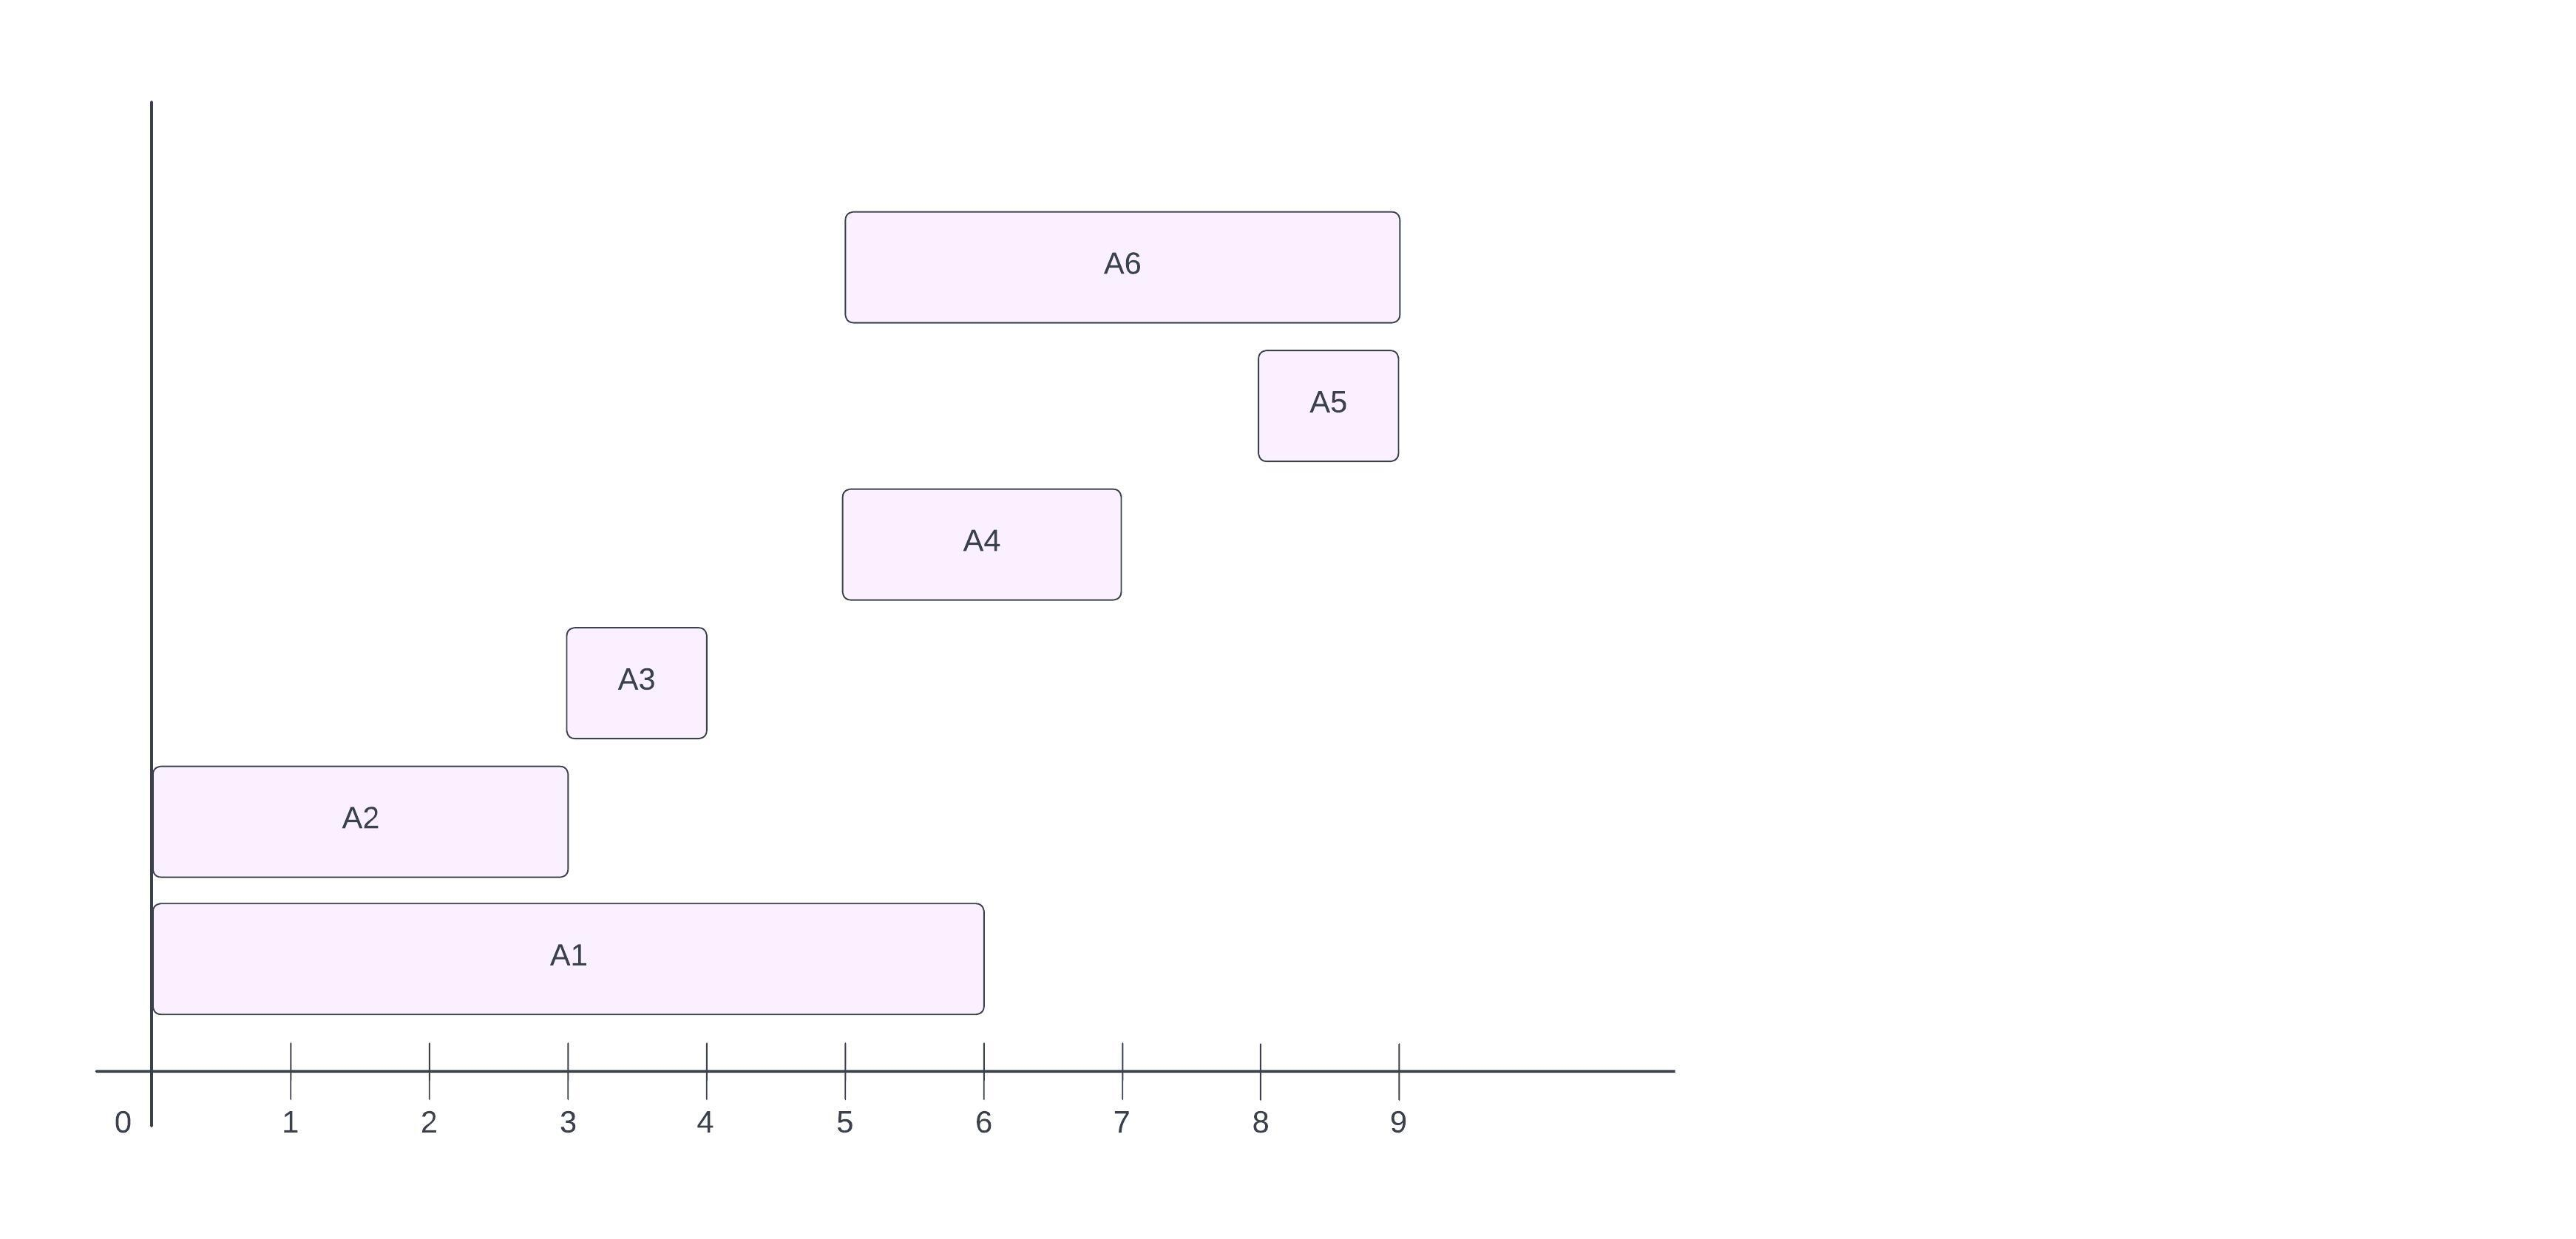

We can see that maximum number of non-overlapping activities are **A4, A3, A4 and A5**.

**Time Complexity: O(n logn)**

---

The activity selection problem has various real-world applications, such as:

1. **Job Scheduling:** In a company, there are multiple tasks to be performed by employees, and each task has a start time and an end time. The goal is to assign tasks to employees in a way that maximizes the number of tasks completed.
2. **Classroom Scheduling**: In a school or university, there are multiple classes to be scheduled in classrooms. The goal is to schedule the classes in a way that maximizes the use of the available classrooms.
3. **Conference Scheduling:** In a conference, there are multiple talks to be scheduled in rooms. The goal is to schedule the talks in a way that maximizes the number of talks attended by the attendees.
4. **Project Management:** In a project, there are multiple tasks to be performed by team members, and each task has a start time and an end time. The goal is to assign tasks to team members in a way that minimizes the time to complete the project.

Overall, the activity selection problem helps in optimizing the usage of resources while minimizing the overall cost or time.

---

# 2. Huffman Coding

Huffman coding is a lossless data compression algorithm that is widely used in computer science and data transmission. It is named after David A. Huffman, who invented it in 1952. The basic idea behind Huffman coding is to assign variable-length codes to different symbols in a given input, where the code length is inversely proportional to the frequency of occurrence of the symbol in the input.

---

The algorithm works as follows:

1. Count the frequency of occurrence of each symbol in the input.
2. Create a binary tree with each symbol as a leaf node and its frequency as the weight of the node.
3. Combine the two nodes with the lowest weights (frequencies) to create a new node whose weight is the sum of the weights of the two nodes. The two nodes become the left and right children of the new node.
4. Repeat step 3 until there is only one node left in the tree. This node becomes the root of the tree.
5. Assign 0 to the left edge of each node and 1 to the right edge of each node.
6. Traverse the tree from the root to each leaf node and record the path (i.e., the sequence of 0s and 1s) as the code for the corresponding symbol.
7. Encode the input using the generated codes and transmit the encoded data.

---

Here is the Python code for Huffman coding algorithm:

In [ ]:
def huffman_encoding(data):
  # Step 1: Count the frequency of occurrence of each symbol in the input.
  freq = defaultdict(int)
  for symbol in data:
    freq[symbol] += 1

  # Step 2: Create a binary tree with each symbol as a leaf node and its frequency as the weight of the node.
  heap = [[weight, [symbol, ""]] for symbol, weight in freq.items()]
  heapify(heap)

  # Step 3 and 4: Combine the two nodes with the lowest weights (frequencies) to create a new node whose weight is the sum of the weights of the two nodes.
  while len(heap) > 1:
    lo = heappop(heap)
    hi = heappop(heap)
    for pair in lo[1:]:
      pair[1] = '0' + pair[1]
    for pair in hi[1:]:
      pair[1] = '1' + pair[1]
    heappush(heap, [lo[0] + hi[0]] + lo[1:] + hi[1:])

  # Step 5 and 6: Assign 0 to the left edge of each node and 1 to the right edge of each node.
  # Traverse the tree from the root to each leaf node and record the path (i.e., the sequence of 0s and 1s) as the code for the corresponding symbol.
  code_dict = dict(heappop(heap)[1:])
  encoded_data = "".join([code_dict[symbol] for symbol in data])

  return encoded_data, code_dict

---

For example, suppose we have the following text:

In [ ]:
text = "Yashashree is brilliant"
encoded_data, code_dict = huffman_encoding(text)
print('Encoded text is:', encoded_data)

Encoded text is: 110100111011111011101111101011101110110010010111001101101010000000010001100100011


---

Now, below is the code to decode original text from encoded text.

In [ ]:
def huffman_decoding(encoded_data, code_dict):
    # Step 7: Decode the input using the generated codes.
    current_code = ""
    decoded_data = ""

    for bit in encoded_data:
        current_code += bit
        for symbol, code in code_dict.items():
            if current_code == code:
                decoded_data += symbol
                current_code = ""
                break

    return decoded_data

In [ ]:
print('Original text extracted from encoded text is:', huffman_decoding(encoded_data, code_dict))

Original text extracted from encoded text is: Yashashree is brilliant


**Time Complexity: O(n logn)**

---

Huffman coding is a widely used lossless data compression algorithm that is based on building a variable-length code table for characters in a given input stream. Here are some real-world implementations of Huffman coding:

1. **Data Compression:** Huffman coding is widely used in data compression software such as gzip and bzip2, which are used to compress files on disk or during transmission over a network.
2. **Image and Audio Compression:** Huffman coding is used to compress images and audio signals by encoding the pixel or sample values with variable-length codes. This results in significant reductions in file size without losing quality.
3. **Network Protocols:** Huffman coding is used in some network protocols such as HTTP and SSL/TLS to compress data before transmission over the network.
4. **File Archiving:** Huffman coding is used in file archiving tools such as WinZip and WinRAR to compress files before archiving them.
5. **Speech Coding:** Huffman coding is used in speech coding applications such as speech synthesis and speech recognition to compress speech signals and reduce the amount of data needed for storage or transmission.